<a href="https://colab.research.google.com/github/lilianabs/fake-news-detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'FakeNewsDetection/data/'

Mounted at /content/gdrive


In [2]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Data de noticias-falsas-en-espaol

https://www.kaggle.com/arseniitretiakov/noticias-falsas-en-espaol

In [5]:
train = pd.read_csv(base_dir + "train.csv")
test = pd.read_csv(base_dir + "test.csv")

In [6]:
train.head()

,title,text,label
0,NaN,El suceso ha tenido lugar en Brasil. Un adole...,1
1,"""La quimioterapia mata a la gente y no al cánc...",Estamos en la semana decisiva. Los expertos a...,1
2,Los Cubos De Caldo Para Cocinar Son Veneno Par...,Estudios científicos hay muchos. Unos nos int...,1
3,MEGATERREMOTO EN LOS PRÓXIMOS DÍAS ALINEACIÓN ...,Ha sucedido en la ciudad de San José de Río P...,1
4,¡Qué injusticia! El perro que defendió su casa...,La fiesta en Sevilla por el vuelco electoral ...,1


In [7]:
test.head()

,title,text
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó..."
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci..."
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...


In [8]:
print("Train size ", train.shape)
print("Test size ", test.shape)

(1600, 3)

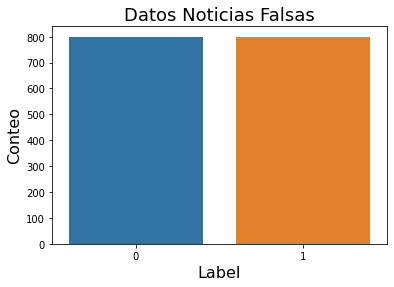

In [10]:
sns.countplot(x="label", data=train);
plt.title('Datos Noticias Falsas', fontsize=18);
plt.xlabel('Label', fontsize=16);
plt.ylabel('Conteo', fontsize=16);

In [11]:
long_fake_news = train[train['label']==1]['text'].str.len()
long_real_news = train[train['label']==0]['text'].str.len()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


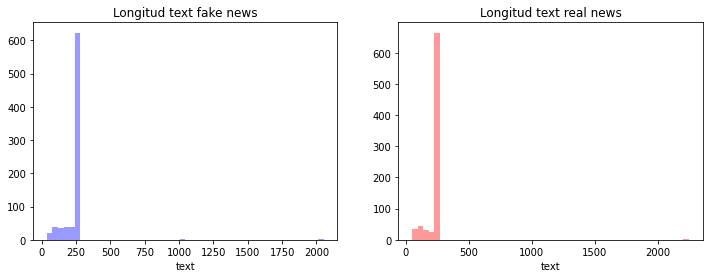

In [12]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(long_fake_news , kde=False, color='blue', ax=axes[0]).set_title('Longitud text fake news');
sns.distplot(long_real_news, kde=False, color='red', ax=axes[1]).set_title('Longitud text real news');

# Data de fake-and-real-news

https://www.kaggle.com/zulanac/fake-and-real-news

In [13]:
train = pd.read_csv(base_dir + "spanishFakeNews.csv")
test = pd.read_csv(base_dir + "testSpanishFakeNews.csv")

In [14]:
train.head()

,texto,clase
0,El año pasado la Ciudad de México se estremeci...,fake
1,Manuela Carmena pide a los madrileños que guar...,fake
2,Una fuerte sorpresa se llevó el todavía presid...,fake
3,La 1 de Televisión Española repitió ayer como ...,fake
4,685 curas católicos fueron acusados de abuso s...,real


In [15]:
test.head()

,texto,clase
0,Las concursantes del Miss Universo 2018 han co...,fake
1,Luego de mantener un perfil bajo por el éxito ...,fake
2,Gran sorpresa se llevó la hija de Donald Trump...,fake
3,Aunque muchos los odien y los critiquen porque...,fake
4,"Nacional , Salud y bienestar. Polémica por cer...",fake


In [16]:
print("Train size ", train.shape)
print("Test size ", test.shape)

Train size  (538, 2)
Test size  (60, 2)


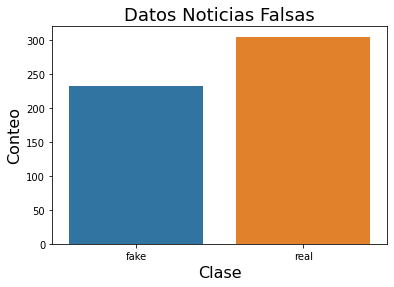

In [18]:
sns.countplot(x="clase", data=train);
plt.title('Datos Noticias Falsas', fontsize=18);
plt.xlabel('Clase', fontsize=16);
plt.ylabel('Conteo', fontsize=16);

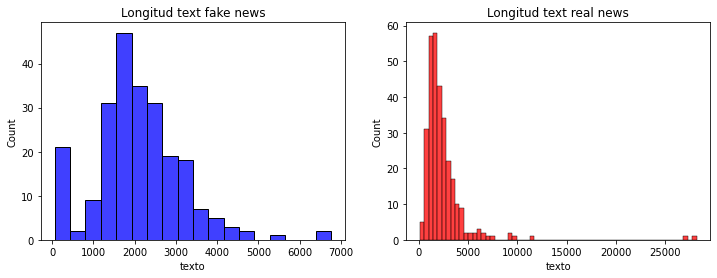

In [21]:
long_fake_news = train[train['clase']=='fake']['texto'].str.len()
long_real_news = train[train['clase']=='real']['texto'].str.len()

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(long_fake_news , kde=False, color='blue', ax=axes[0]).set_title('Longitud text fake news');
sns.histplot(long_real_news, kde=False, color='red', ax=axes[1]).set_title('Longitud text real news');


# Data de jpposadas

https://github.com/jpposadas/FakeNewsCorpusSpanish

In [22]:
train = pd.read_excel(base_dir + "train.xlsx")
test = pd.read_excel(base_dir + "test.xlsx")

In [23]:
train.head()

,Id,Category,Topic,Source,Headline,Text,Link
0,1,Fake,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,Fake,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...
2,3,Fake,Education,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...
3,4,True,Education,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...
4,5,Fake,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...


In [24]:
test.head()

,ID,CATEGORY,TOPICS,SOURCE,HEADLINE,TEXT,LINK
0,1,True,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,False,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...
2,3,True,Política,El País,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...
3,4,False,Política,AFPFactual,NaN,Se han dado a conocer los datos electorales pr...,https://perma.cc/GYE6-SPMB
4,5,True,Sociedad,La Republica,El censo poblacional 2018 tendrá un costo de $...,La primera fase del censo será virtual y solo ...,https://www.larepublica.co/economia/el-censo-p...


In [25]:
print("Train size ", train.shape)
print("Test size ", test.shape)

Train size  (676, 7)
Test size  (572, 7)


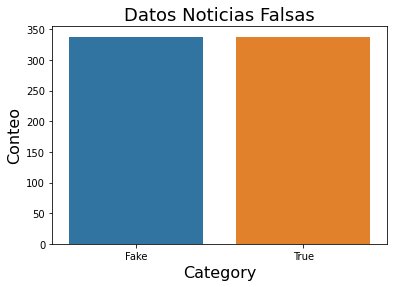

In [26]:
sns.countplot(x="Category", data=train);
plt.title('Datos Noticias Falsas', fontsize=18);
plt.xlabel('Category', fontsize=16);
plt.ylabel('Conteo', fontsize=16);

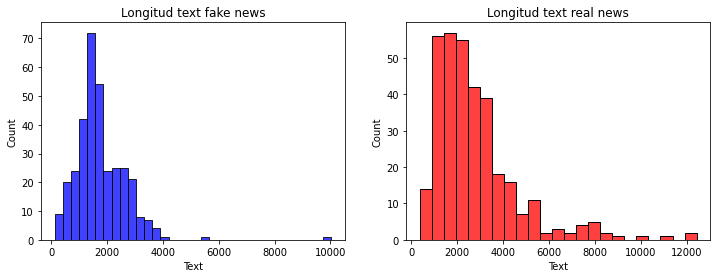

In [27]:
long_fake_news = train[train['Category']=='Fake']['Text'].str.len()
long_real_news = train[train['Category']=='True']['Text'].str.len()

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(long_fake_news , kde=False, color='blue', ax=axes[0]).set_title('Longitud text fake news');
sns.histplot(long_real_news, kde=False, color='red', ax=axes[1]).set_title('Longitud text real news');